<a href="https://colab.research.google.com/github/Hero0963/data_science/blob/main/data_science_ch09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# exercise_01

# read penguin data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch09/penguin.csv')
df.info()

Mounted at /content/MyGoogleDrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                338 non-null    int64  
 1   Length_cm         315 non-null    float64
 2   Weight_g          329 non-null    float64
 3   Species           338 non-null    object 
 4   Scientific Name   338 non-null    object 
 5   Inspector         338 non-null    object 
 6   Measurement Date  338 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.6+ KB


In [2]:
# penguin data cleaning
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         309 non-null    float64
 2   Weight_g          323 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 20.8+ KB


In [3]:
df=df.reset_index(drop=True)
df

,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.0,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.0,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.0,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.0,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,NaN,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.0,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.0,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.0,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.0,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [4]:
species_list=df['Species'].unique().tolist()

for species in species_list:
    filter=df['Species']==species
    m_l=(df[filter]['Length_cm'].mean())
    m_w=(df[filter]['Weight_g'].mean())
    df.loc[filter,'Length_cm']=df.loc[filter,'Length_cm'].fillna(m_l)
    df.loc[filter,'Weight_g']=df.loc[filter,'Weight_g'].fillna(m_w)
  

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         332 non-null    float64
 2   Weight_g          332 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.3+ KB


,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [5]:
s={'Chinstrap penguin':0,'Little penguin':1,'Galapagos penguin':2,'Gentoo penguin':3,}
df['Species']=df['Species'].map(s)
df=df.astype({'Species': 'int'})
df

,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,2,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,0,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,0,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,0,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,3,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,0,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,2,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,1,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,1,Eudyptula minor,Antisthenes,1990/9/22


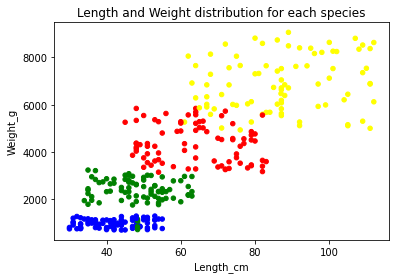

In [6]:
# plot Length_cm-Weight_g -> Species scatter graph
# color list = https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/

c={ 0:'red', 1:'blue',2:'green',3:'yellow',}
df['colors']=df['Species'].map(c)

df.plot(kind='scatter',x='Length_cm',y='Weight_g',c=df['colors'], title= 'Length and Weight distribution for each species')

In [7]:
# training model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
df_X = df[['Length_cm','Weight_g']]
df_y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2)


# pick suitable k
s = []
for i in range(3,11):
  k=i
  knn=KNeighborsClassifier(n_neighbors=k)  
  knn.fit(X_train, y_train)  
  print('k =',k,' score:',knn.score(X_test,y_test))  
  s.append(knn.score(X_test,y_test))

k = 3  score: 0.9402985074626866
k = 4  score: 0.9253731343283582
k = 5  score: 0.9253731343283582
k = 6  score: 0.9253731343283582
k = 7  score: 0.8656716417910447
k = 8  score: 0.9104477611940298
k = 9  score: 0.9104477611940298
k = 10  score: 0.9253731343283582


In [8]:
# pick k
k = 7
knn=KNeighborsClassifier(n_neighbors=k)  
knn.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=7)

In [9]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test.values) 
accuracy_score(y_test, pred)

0.8656716417910447

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[11,  0,  0,  5],
       [ 0, 16,  0,  0],
       [ 0,  2, 15,  0],
       [ 2,  0,  0, 16]])

In [11]:
test_data=[[52,1234]]
idx=knn.predict(test_data) 

ans=int(idx)

name_list=['南極','小藍','加拉','巴布亞','未知']

if ans<len(name_list):
    print(name_list[ans])
else:
    print(name_list[-1])

小藍


In [12]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/penguin09.csv',index=False)

In [32]:
# exercise_02

# read ShoeSize data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch09/ShoeSize.csv')
df.info()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10009 non-null  int64  
 1   Gender        10009 non-null  object 
 2   Height_cm     10004 non-null  float64
 3   Weight_kg     9999 non-null   float64
 4   Shoe size_cm  9994 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 391.1+ KB


In [33]:
# shoesize data cleaning
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10000 non-null  int64  
 1   Gender        10000 non-null  object 
 2   Height_cm     9995 non-null   float64
 3   Weight_kg     9990 non-null   float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.8+ KB


In [34]:
df=df.reset_index(drop=True)
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm
0,1,Male,175.0,83.0,28.0
1,2,Male,195.0,112.0,31.0
2,3,Male,175.0,90.0,28.5
3,4,Female,154.0,58.0,22.5
4,5,Female,154.0,58.0,22.5
...,...,...,...,...,...
9995,9996,Female,157.0,59.0,23.0
9996,9997,Male,183.0,98.0,29.0
9997,9998,Female,162.0,61.0,24.5
9998,9999,Female,160.0,57.0,24.0


In [35]:
gender_list=df['Gender'].unique().tolist()

for gender in gender_list:
    filter=df['Gender']==gender
    m_l=(df[filter]['Height_cm'].mean())
    m_w=(df[filter]['Weight_kg'].mean())
    df.loc[filter,'Height_cm']=df.loc[filter,'Height_cm'].fillna(m_l)
    df.loc[filter,'Weight_kg']=df.loc[filter,'Weight_kg'].fillna(m_w)
  

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10000 non-null  int64  
 1   Gender        10000 non-null  object 
 2   Height_cm     10000 non-null  float64
 3   Weight_kg     10000 non-null  float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 390.8+ KB


,ID,Gender,Height_cm,Weight_kg,Shoe size_cm
0,1,Male,175.0,83.0,28.0
1,2,Male,195.0,112.0,31.0
2,3,Male,175.0,90.0,28.5
3,4,Female,154.0,58.0,22.5
4,5,Female,154.0,58.0,22.5
...,...,...,...,...,...
9995,9996,Female,157.0,59.0,23.0
9996,9997,Male,183.0,98.0,29.0
9997,9998,Female,162.0,61.0,24.5
9998,9999,Female,160.0,57.0,24.0


In [36]:
df=df.dropna(axis='rows',how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9985 non-null   int64  
 1   Gender        9985 non-null   object 
 2   Height_cm     9985 non-null   float64
 3   Weight_kg     9985 non-null   float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.0+ KB


In [37]:
df=df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9985 non-null   int64  
 1   Gender        9985 non-null   object 
 2   Height_cm     9985 non-null   float64
 3   Weight_kg     9985 non-null   float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 390.2+ KB


In [38]:
from random import randint
colors_list=[]
n=len(gender_list)
for i in range(n):
  colors_list.append('#%06X' % randint(0, 0xFFFFFF))

c=dict(zip(gender_list, colors_list))
df['colors']=df['Gender'].map(c)
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm,colors
0,1,Male,175.0,83.0,28.0,#A7D0B6
1,2,Male,195.0,112.0,31.0,#A7D0B6
2,3,Male,175.0,90.0,28.5,#A7D0B6
3,4,Female,154.0,58.0,22.5,#56B46E
4,5,Female,154.0,58.0,22.5,#56B46E
...,...,...,...,...,...,...
9980,9996,Female,157.0,59.0,23.0,#56B46E
9981,9997,Male,183.0,98.0,29.0,#A7D0B6
9982,9998,Female,162.0,61.0,24.5,#56B46E
9983,9999,Female,160.0,57.0,24.0,#56B46E


In [39]:
s={'Female':0,'Male':1}
df['Gender']=df['Gender'].map(s)
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm,colors
0,1,1,175.0,83.0,28.0,#A7D0B6
1,2,1,195.0,112.0,31.0,#A7D0B6
2,3,1,175.0,90.0,28.5,#A7D0B6
3,4,0,154.0,58.0,22.5,#56B46E
4,5,0,154.0,58.0,22.5,#56B46E
...,...,...,...,...,...,...
9980,9996,0,157.0,59.0,23.0,#56B46E
9981,9997,1,183.0,98.0,29.0,#A7D0B6
9982,9998,0,162.0,61.0,24.5,#56B46E
9983,9999,0,160.0,57.0,24.0,#56B46E


In [40]:
df=df.astype({'Shoe size_cm': 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9985 non-null   int64  
 1   Gender        9985 non-null   int64  
 2   Height_cm     9985 non-null   float64
 3   Weight_kg     9985 non-null   float64
 4   Shoe size_cm  9985 non-null   int64  
 5   colors        9985 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.2+ KB


In [41]:
df['BMI']= df['Weight_kg'] / ((df['Height_cm']/100.0)**2)
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm,colors,BMI
0,1,1,175.0,83.0,28,#A7D0B6,27.102041
1,2,1,195.0,112.0,31,#A7D0B6,29.454306
2,3,1,175.0,90.0,28,#A7D0B6,29.387755
3,4,0,154.0,58.0,22,#56B46E,24.456063
4,5,0,154.0,58.0,22,#56B46E,24.456063
...,...,...,...,...,...,...,...
9980,9996,0,157.0,59.0,23,#56B46E,23.936062
9981,9997,1,183.0,98.0,29,#A7D0B6,29.263340
9982,9998,0,162.0,61.0,24,#56B46E,23.243408
9983,9999,0,160.0,57.0,24,#56B46E,22.265625


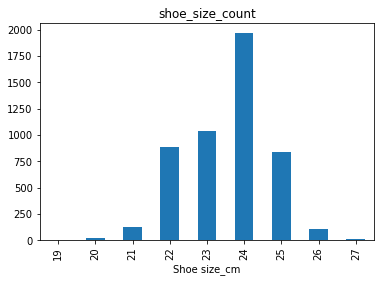

In [42]:
filter_female=df['Gender']==0
ax=df[filter_female].groupby(['Shoe size_cm'])['ID'].count().plot(kind='bar',title='shoe_size_count')

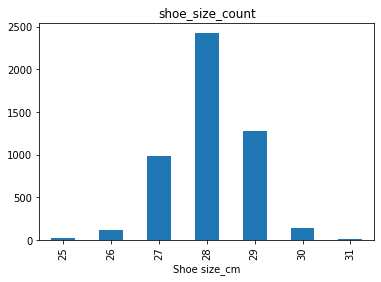

In [43]:
filter_male=df['Gender']==1
df[filter_male].groupby(['Shoe size_cm'])['ID'].count().plot(kind='bar',title='shoe_size_count')

13


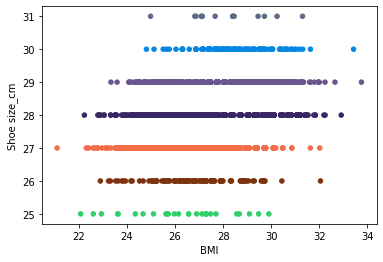

In [44]:
from random import randint
shoe_size_list=df['Shoe size_cm'].unique().tolist()
# print(shoe_size_list)
# print(type(shoe_size_list))
n=len(shoe_size_list)
colors_list=[]
for i in range(n):
  colors_list.append('#%06X' % randint(0, 0xFFFFFF))
                                    
# colors_list
color_converter = dict(zip(shoe_size_list, colors_list))
print(len(color_converter))

df['shoe_size_colors']=df['Shoe size_cm'].map(color_converter)

df[filter_male].plot(kind='scatter',x='BMI',y='Shoe size_cm',c=df[filter_male]['shoe_size_colors'])

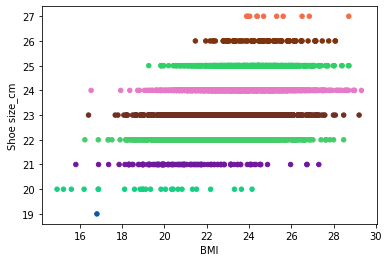

In [45]:
df[filter_female].plot(kind='scatter',x='BMI',y='Shoe size_cm',c=df[filter_female]['shoe_size_colors'])

In [46]:
# training model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
df_X = df[['Gender','Height_cm','BMI']]
df_y = df['Shoe size_cm']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2)


# pick suitable k
s = []
for i in range(3,11):
  k=i
  knn=KNeighborsClassifier(n_neighbors=k)  
  knn.fit(X_train, y_train)  
  print('k =',k,' score:',knn.score(X_test,y_test))  
  s.append(knn.score(X_test,y_test))

k = 3  score: 0.8828242363545318
k = 4  score: 0.8843264897346019
k = 5  score: 0.8863294942413621
k = 6  score: 0.8873309964947421
k = 7  score: 0.8878317476214321
k = 8  score: 0.8893340010015023
k = 9  score: 0.8878317476214321
k = 10  score: 0.8868302453680521


In [47]:
# pick k
k = 8
knn=KNeighborsClassifier(n_neighbors=k)  
knn.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=8)

In [48]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test.values) 
accuracy_score(y_test, pred)

0.8893340010015023

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  20,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 174,  15,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   8, 193,  14,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1, 368,   9,   0,   1,   0,   0,   0,   0],
       [  0,   0,   4,   0,  26, 142,   1,   0,   4,   0,   0,   0],
       [  0,   0,   1,   0,   1,   7,  18,   7,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0, 165,  32,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  11, 444,  17,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  27, 230,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  19,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0]])

In [50]:
test_data=[[1,176,24.85],[0,162,20.19]] 
v=knn.predict(test_data)
print(v)

[28 24]


In [52]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/shoesize09.csv',index=False)